# **Importações**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# **Instâncias**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelLog = LogisticRegression()
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

# **Sexo Binário**

In [ ]:
def trans_sex(value):
  if value == 'female':
    return 1
  else:
    return 0

train['Sex_Bin'] = train['Sex'].map(trans_sex)

# **Dividir Dados**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5)

# **1º Modelo**

In [ ]:
variables = ['Sex_Bin', 'Age']

X = train[variables]
X = X.fillna(-1)

y = train['Survived']

model.fit(X_train, y_train)



RandomForestClassifier(n_jobs=-1, random_state=0)

**Aplicando Modelo**

In [ ]:
test['Sex_Bin'] = test['Sex'].map(trans_sex)

X_prev = test[variables]
X_prev = X_prev.fillna(-1)

***Predição e 1º Modelo***

In [ ]:
pred = model.predict(X_valid)
np.mean(y_valid == pred)

0.8089887640449438

# **2º Modelo**

**Validação Cruzada 2º**

In [ ]:
results = []

for lines_train, lines_valid in kf.split(X):
  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]
  model.fit(X_train, y_train)
  pred = model.predict(X_valid)
  results.append(np.mean(y_valid == pred))

**Média Acurácia 2º Modelo**

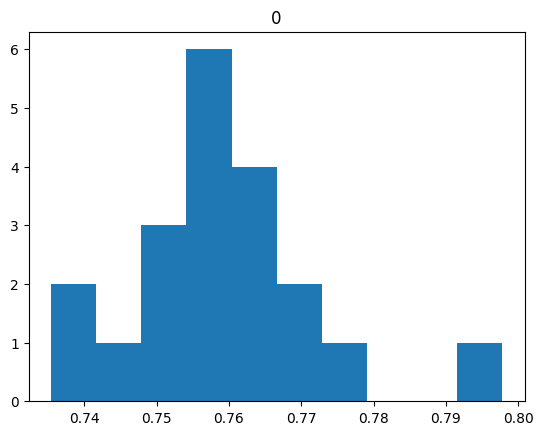

In [ ]:
df = pd.DataFrame(results)
hist = df.hist(grid=False,bins=10)

# **3º Modelo**

**Novas Variáveis**

In [ ]:
variables = ['Sex_Bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variables]
X = X.fillna(-1)

y = train['Survived']

**Validação Cruzada 3º Modelo**

In [ ]:
results = []

for lines_train, lines_valid in kf.split(X):
  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]
  model.fit(X_train, y_train)
  pred = model.predict(X_valid)
  results.append(np.mean(y_valid == pred))

**Média Acurácia 3º Modelo**

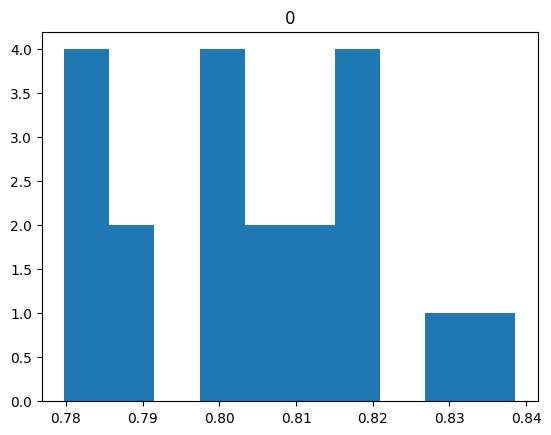

In [ ]:
df = pd.DataFrame(results)
hist = df.hist(grid=False,bins=10)

**Retreino 3º**

In [ ]:
  model.fit(X, y)
  pred = model.predict(test[variables].fillna(-1))

# **4º Modelo**

**Novas Variáveis**



In [ ]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabin_Null'] = train['Cabin'].isnull().astype(int)

train['Name_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Name_Mrs'] = train['Name'].str.contains("Mrs").astype(int)
train['Name_Master'] = train['Name'].str.contains("Master").astype(int)
train['Name_Col'] = train['Name'].str.contains("Col").astype(int)
train['Name_Major'] = train['Name'].str.contains("Major").astype(int)
train['Name_Mr'] = train['Name'].str.contains("Mr").astype(int)

variables = ['Sex_Bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S',
           'Embarked_C', 'Cabin_Null', 'Name_Miss', 'Name_Mrs',
           'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr']

X = train[variables].fillna(-1)
y = train['Survived']

**Validação Cruzada 4º Modelo**

In [ ]:
results2 = []

for lines_train, lines_valid in kf.split(X):
  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

  model.fit(X_train, y_train)
  pred = model.predict(X_valid)

  results2.append(np.mean(y_valid == pred))

**Retreino 4º**

In [ ]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
# test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_Null'] = test['Cabin'].isnull().astype(int)

test['Name_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Name_Mrs'] = test['Name'].str.contains("Mrs").astype(int)
test['Name_Master'] = test['Name'].str.contains("Master").astype(int)
test['Name_Col'] = test['Name'].str.contains("Col").astype(int)
test['Name_Major'] = test['Name'].str.contains("Major").astype(int)
test['Name_Mr'] = test['Name'].str.contains("Mr").astype(int)

model.fit(X, y)
pred = model.predict(test[variables].fillna(-1))

**Média Acurácia 4º Modelo**

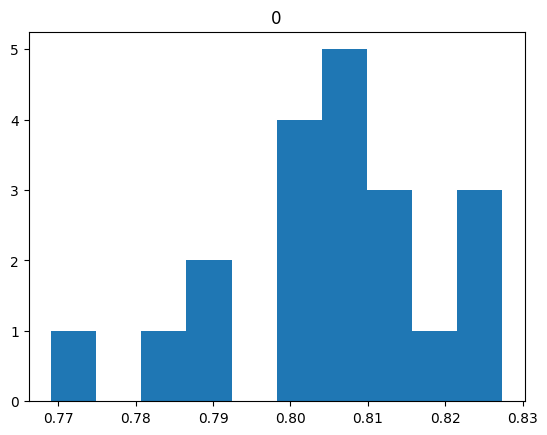

In [ ]:
df = pd.DataFrame(results2)
hist = df.hist(grid=False,bins=10)

# **5º Modelo**

**Retreino 5º Modelo**

In [ ]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
# test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_Null'] = test['Cabin'].isnull().astype(int)

test['Name_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Name_Mrs'] = test['Name'].str.contains("Mrs").astype(int)
test['Name_Master'] = test['Name'].str.contains("Master").astype(int)
test['Name_Col'] = test['Name'].str.contains("Col").astype(int)
test['Name_Major'] = test['Name'].str.contains("Major").astype(int)
test['Name_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelLog.fit(X, y)
pred = modelLog.predict(test[variables].fillna(-1))

**Regressão Logística 5º Modelo**

**Média Acurácia 5º**

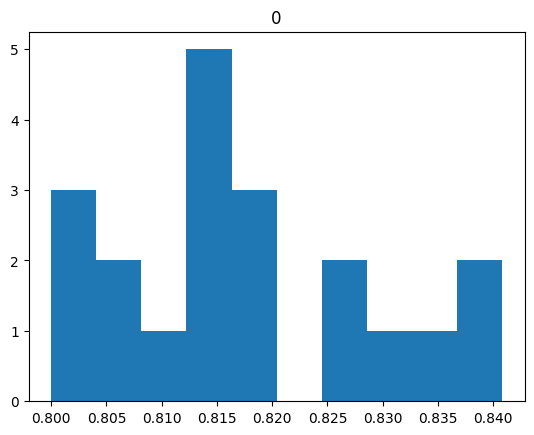

In [ ]:
df = pd.DataFrame(results3)
hist = df.hist(grid=False,bins=10)

# **Gráficos Demonstrativos**

**Gráfico de Idade/Sexo por Sobrevivência**

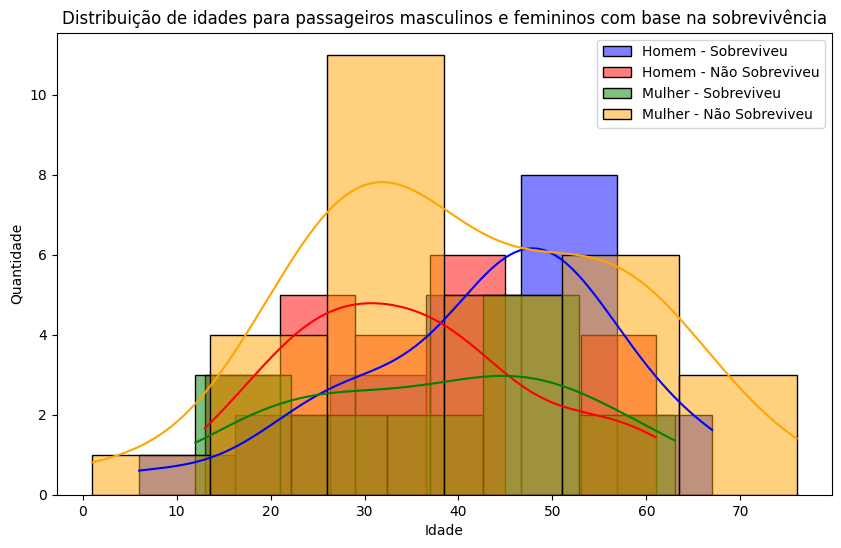

In [ ]:
test['Survived'] = pd.Series(pred)
test = test.dropna()

male_passengers = test[test['Sex_Bin'] == 0]
female_passengers = test[test['Sex_Bin'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(male_passengers[male_passengers['Survived'] == 1]['Age'], kde=True, color='blue', label='Homem - Sobreviveu')
sns.histplot(male_passengers[male_passengers['Survived'] == 0]['Age'], kde=True, color='red', label='Homem - Não Sobreviveu')
sns.histplot(female_passengers[female_passengers['Survived'] == 1]['Age'], kde=True, color='green', label='Mulher - Sobreviveu')
sns.histplot(female_passengers[female_passengers['Survived'] == 0]['Age'], kde=True, color='orange', label='Mulher - Não Sobreviveu')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de idades para passageiros masculinos e femininos com base na sobrevivência')
plt.legend()
plt.show()

**Gráfico de Sobreviventes por Classe Econômica**

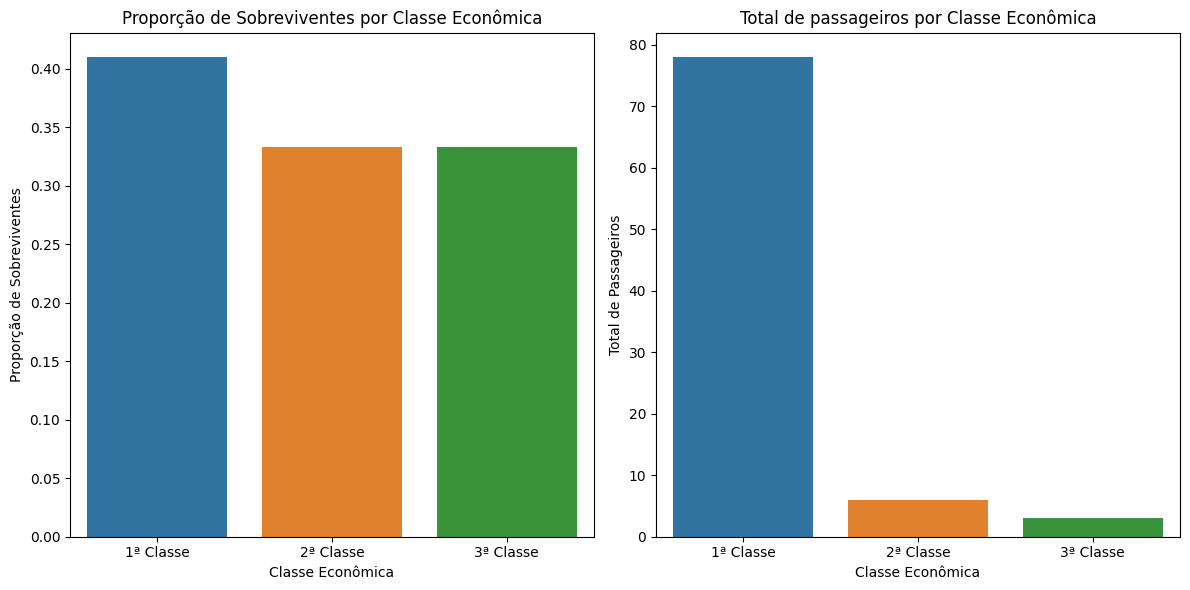

In [ ]:
pclass_survival = test.groupby('Pclass')['Survived'].mean()
pclass_counts = test['Pclass'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=pclass_survival.index, y=pclass_survival.values, ax=axes[0])
axes[0].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'])
axes[0].set_xlabel('Classe Econômica')
axes[0].set_ylabel('Proporção de Sobreviventes')
axes[0].set_title('Proporção de Sobreviventes por Classe Econômica')

sns.barplot(x=pclass_counts.index, y=pclass_counts.values, ax=axes[1])
axes[1].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'])
axes[1].set_xlabel('Classe Econômica')
axes[1].set_ylabel('Total de Passageiros')
axes[1].set_title('Total de passageiros por Classe Econômica')

plt.tight_layout()
plt.show()

**Gráfico do Valor da Tarifa pela Taxa de Sobrevivência**

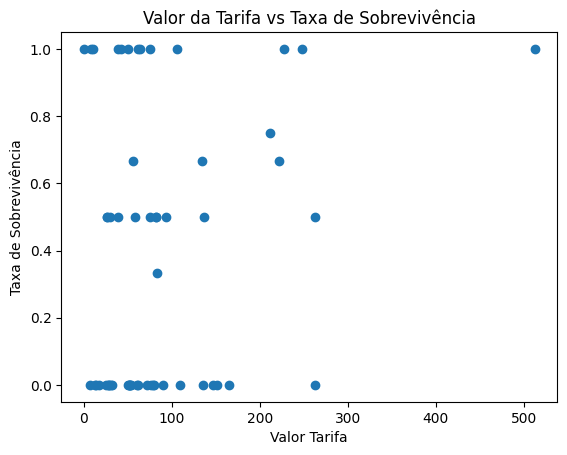

In [ ]:
fare_survival_rate = test.groupby('Fare')['Survived'].mean().reset_index()

plt.scatter(fare_survival_rate['Fare'], fare_survival_rate['Survived'])
plt.xlabel('Valor Tarifa')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Valor da Tarifa vs Taxa de Sobrevivência')
plt.show()

**DataFrame Predição por Passageiro**

In [ ]:
prediction = pd.Series(pred)
prediction = prediction.dropna()

df_predictions = pd.DataFrame({'Passageiro': test['PassengerId'], 'Sobreviveu': prediction})
print(df_predictions)


     Passageiro  Sobreviveu
0           NaN           0
1           NaN           1
2           NaN           1
3           NaN           1
4           NaN           0
..          ...         ...
440         NaN           0
441         NaN           1
442         NaN           0
443         NaN           1
444         NaN           0

[445 rows x 2 columns]
